In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import seaborn as sns

In [238]:
df =pd.read_csv("gas_turbines.csv")
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [307]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [240]:
df.corr()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.207495,-0.100705,-0.088588,-0.600006
AP,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.146939,0.131198,0.041614,0.256744
AH,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.110272,-0.182010,0.165505,0.143061
AFDP,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.717995,0.727152,-0.334207,-0.037299
GTEP,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.977042,0.993784,-0.508259,-0.208496
TIT,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.891587,0.887238,-0.688272,-0.231636
TAT,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.720356,-0.744740,0.063404,0.009888
TEY,-0.207495,0.146939,-0.110272,0.717995,0.977042,0.891587,-0.720356,1.000000,0.988473,-0.541751,-0.102631
CDP,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,0.988473,1.000000,-0.520783,-0.169103
CO,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.541751,-0.520783,1.000000,0.316743


<AxesSubplot:>

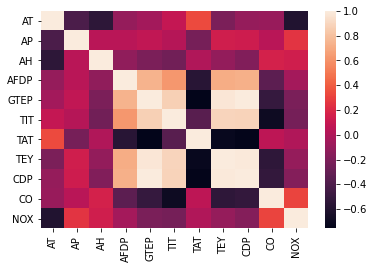

In [241]:
sns.heatmap(data = df.corr())

In [242]:
# from above heatmap we can see that GTEP and CDP are highly correlated, so lets drop GTEP

In [243]:
X= df.drop(["TEY", "GTEP"], axis=1)
X.head()

,AT,AP,AH,AFDP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,1059.7,549.98,10.612,3.2484,82.311


In [244]:
y = pd.DataFrame({"TEY":df.iloc[:,7]})
y.head()

,TEY
0,114.70
1,114.72
2,114.71
3,114.72
4,114.72


In [245]:
# Making split for training and testing data
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [246]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [247]:
# Applying Standard scalar on the data
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler()
X_train = scaled.fit_transform(X_train)
X_test = scaled.transform(X_test)

# Applyig Neural network

In [248]:
#Initialising ANN
classifier = Sequential()

# Adding the input layer and first hidden layer 
classifier.add(Dense(units=30, activation= "relu", input_dim=9))
classifier.add(Dropout(0.2))

# Adding second hidden layer
classifier.add(Dense(units=35,  activation= "relu"))
classifier.add(Dropout(0.2))

classifier.add(Dense(units=30, activation= "relu"))
classifier.add(Dropout(0.2))

# Adding the output layer
classifier.add(Dense(units=1,  activation= "linear"))


# Compling the ANN
classifier.compile(optimizer= "adam", loss="mse", metrics= ["mae", "mse"])

In [249]:
# Fitting the ANN on training data set
#early_stop= keras.callbacks.EarlyStopping(monitor="val_loss", patience=20)
model_history = classifier.fit(X_train, y_train, validation_split=0.3, batch_size=10, epochs=100)

Epoch 1/100
737/737 [==============================] - 1s 1ms/step - loss: 3770.4512 - mae: 44.3898 - mse: 3770.4512 - val_loss: 206.8634 - val_mae: 10.9277 - val_mse: 206.8634
Epoch 2/100
737/737 [==============================] - 1s 1ms/step - loss: 725.3544 - mae: 21.2568 - mse: 725.3544 - val_loss: 123.9744 - val_mae: 8.8924 - val_mse: 123.9744
Epoch 3/100
737/737 [==============================] - 1s 1ms/step - loss: 564.3144 - mae: 18.9032 - mse: 564.3144 - val_loss: 73.1708 - val_mae: 6.7457 - val_mse: 73.1708
Epoch 4/100
737/737 [==============================] - 1s 1ms/step - loss: 494.8334 - mae: 17.7306 - mse: 494.8334 - val_loss: 59.0707 - val_mae: 6.5421 - val_mse: 59.0707
Epoch 5/100
737/737 [==============================] - 1s 1ms/step - loss: 447.0668 - mae: 16.7549 - mse: 447.0668 - val_loss: 32.2346 - val_mae: 4.5517 - val_mse: 32.2346
Epoch 6/100
737/737 [==============================] - 1s 1ms/step - loss: 417.0318 - mae: 16.1106 - mse: 417.0318 - val_loss: 28.635

Epoch 96/100
737/737 [==============================] - 1s 1ms/step - loss: 155.2825 - mae: 9.8261 - mse: 155.2825 - val_loss: 3.8443 - val_mae: 1.5243 - val_mse: 3.8443
Epoch 97/100
737/737 [==============================] - 1s 1ms/step - loss: 151.7183 - mae: 9.6723 - mse: 151.7183 - val_loss: 3.5660 - val_mae: 1.5421 - val_mse: 3.5660
Epoch 98/100
737/737 [==============================] - 1s 1ms/step - loss: 151.6084 - mae: 9.6905 - mse: 151.6084 - val_loss: 5.0904 - val_mae: 1.7556 - val_mse: 5.0904
Epoch 99/100
737/737 [==============================] - 1s 1ms/step - loss: 153.9259 - mae: 9.7897 - mse: 153.9259 - val_loss: 5.3444 - val_mae: 1.8326 - val_mse: 5.3444
Epoch 100/100
737/737 [==============================] - 1s 1ms/step - loss: 154.1151 - mae: 9.7522 - mse: 154.1151 - val_loss: 7.9919 - val_mae: 2.5713 - val_mse: 7.9919


In [250]:
print(model_history.history.keys())

dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])


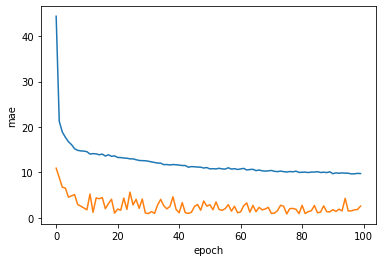

In [253]:
plt.xlabel("epoch")
plt.ylabel("mae")
plt.plot(model_history.epoch, model_history.history["mae"] )
plt.plot(model_history.epoch, model_history.history["val_mae"] )
plt.show()

In [254]:
# Predicting the test 
y_pred = classifier.predict(X_test)

In [273]:
y_pred

array([[131.91829],
       [109.57536],
       [131.74927],
       ...,
       [153.42575],
       [130.8545 ],
       [155.57964]], dtype=float32)

In [281]:
y_test= y_test.reset_index(drop= True)
y_test

,Actual
0,134.46
1,111.88
2,133.72
3,133.79
4,110.77
...,...
4507,134.08
4508,102.87
4509,155.96
4510,133.67


In [282]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [283]:
r2_score(y_test, y_pred)

0.9695763361591182

In [284]:
mean_absolute_error(y_test, y_pred)

2.5107056475700213

In [285]:
mean_squared_error(y_test, y_pred)

7.676965790016376

In [288]:
pred_df= pd.DataFrame(y_pred, columns=["TEY"])

In [294]:
cpm_df=pd.concat([y_test, pred_df], axis=1, ignore_index=False)
cpm_df.columns= ["Actual_TEY", "Pred_TEY"]
cpm_df.head()

,Actual_TEY,Pred_TEY
0,134.46,131.918289
1,111.88,109.575363
2,133.72,131.749268
3,133.79,131.598190
4,110.77,109.575363


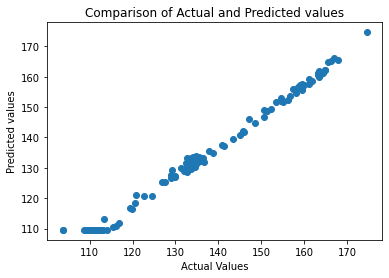

In [308]:
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")
plt.title("Comparison of Actual and Predicted values")
plt.scatter(cpm_df.iloc[0:200, 0], cpm_df.iloc[0:200, 1])